# Stream and Process Live Tweets
#### Alex John Quijano

### 1. Introduction.

Twitter is a social networking platform where users can post messages related to entertainment, current events, news and politics, and other forms of information by creating "Tweets". Twitter users can also interact with each other by replying or retweeting tweets. Twitter has become a platform to many important discourse in relation to politics, science, technology, popular culture, and social movements since it was founded in 2006.

Since the beginning of big data revolution in the 21st century, taking data has become very easy. Twitter data can be mined through its Application Programming Interface (API) but with limits ( see <a href="https://developer.twitter.com/en/docs/basics/rate-limits.html">rate-limits</a> ). There are multiple ways you can mine twitter data but the easiest way possible is using the python NLTK module ( <a href="https://www.nltk.org/">NLTK</a> ) which will be discussed in Section 3.

**GITHUB.** <a href="https://github.com/stressosaurus/raw-data-twitter-tweets">raw-data-twitter-tweets</a>

**Purpose.** The scripts on this repository provides an easy way to stream, filter, and process live tweets iteratively for researchers interested in data science, mathematical modeling, computational linguistics, historical linguistics, and/or discourse analysis. This repository lets you stream live tweets via using the Natural Language Processing Tool Kit (NLTK) developed by Bird et. al. [1]. The code is designed to capture $n$ tweets in a way such that it streams continuously until a specified time. The streamer uses a list of keywords to capture tweets that matches those keywords.

After successful streaming, the code will filter the tweets to reduce the memory size. Processing is done separately to choose which time range to process.

**Warning.** Streaming live tweets for long periods is not recommended because the filesize gets very large unless you have reasonable file storage. The streamer also can capture any public tweets (protected tweets are not captured). That means it can capture, tweets from bot users, pornography, and profanity; when viewing these tweets, it might be NSFW.

### 2. Just Give Me the Data.

**Data Downloads.** If you want the preprocessed datasets you can download them in these following links.

**NOTE.** The time stamps of each tweet is in Universal Coordinated Time (UTC) but the labels of the files below is in Pacific Standard Time (PST).

**Step I: Raw Data.** <a href="https://drive.google.com/open?id=1UvbxIyBvBwFRhoX5zYBWti1Pr47wO7R8">(Raw) September 2017 to October 2017 (31.04GB)</a>

**Step II: Filtered Data.** <a href="https://drive.google.com/open?id=1XlZ541wg3TWFfiAk1GdPF7WC8fqq0oBo">(Filtered) September 2017 to October 2017 (8.54GB)</a>

**Step III: Processed Data.** <a href="https://drive.google.com/open?id=1mNM4Ek9tTAkDPZ0d4I82fYzOWKj5uiOR">(Processed) September 2017 to October 2017 (6.04GB)</a>

**Step IV: Tabulated Data.** This is the processed data converted into table form. <a href="https://drive.google.com/open?id=13WsCp1kzLXKkhzyZpTEzoTfflI5V3-pf">(Tabulated) September 2017 to October 2017 (3.39GB)</a>

**Step V: Subsets and Merged Subsets.** This is the tabulated data selecting only related tweets according to some selected hashtags.

1. <a href="https://drive.google.com/open?id=1lCmrIByasBjOFKE6egNV1VYmUq-j9H_t">(Subset) September 2017 to October 2017 (371MB)</a>
2. <a href="https://drive.google.com/open?id=1pWqnDOpbp7vegr3ThItmqt5L6OYBnB7E">(Merged Subset) September 2017 to October 2017 (379.30MB)</a>

**Data tabulation and subsetting.** The raw Twitter data collected during live streaming was processed in five steps. The first step is when the raw data is saved into a JSON file and processed through a filter and processing steps where the unecessary information (such as hyperlinks and empty strings) are filtered away. The last two steps are the conversion from JSON data structure to a tabular data structure for easy access of information. Tabulating and subsetting is discussed in Section 4.

**Subset information.** The subset datasets are with tweets that contain and relate to the following hashtags (lowercased).
```
takeaknee
taketheknee
blacklivesmatter
alllivesmatter
maga
prayforvegas
lasvegasshooting
guncontrolnow
2a
2ndamendment
metoo
womensmarch
```

**Table Column Descriptions.**
	# *-tweet.csv.gz file: (Table of tweet information where each row is a unique tweet)
	#   1.  TID   - Tweet ID (always unique)
	#   2.  RTT   - Retweeted Tweet (1-True or 0-False)
	#   3.  RPT   - Replied Tweet (1-True or 0-False)
	#   4.  TRP   - Tweet Reply (1-True or 0-False)
	#   5.  NRT   - Normal Tweet (1-True or 0-False)
	#   6.  PTID  - Parent Tweet ID (if the tweet is a reply)
	#   7.  UID   - User ID
	#   8.  USN   - User screen name
	#   9.  TM    - Time created
	#   10. RPC   - Replied Counts
	#   11. FVC   - Favorited Counts
	#   12. RTC   - Retweeted Counts
	#   13. L     - language
	#   14. TXT   - Tweet Text
	#   15. HTGS  - Hashtags (sep=',')
	#   16. UMS   - user mentions (sep=',')
	#   17. TMRT  - Time if retweeted (each observation sep=',')
	#   18. RPCRT - Replied Counts if retweeted (each observation sep=',')
	#   19. FVCRT - Favorited Counts if retweeted (seach observation sep=',')
	#   20. RTCRT - Retweeted Counts if retweeted (each observation sep=',')
	#   21. UIDRT - User IDs if retweeted (each observation sep=',')
	#   22. USNRT - User screen names if retweeted (each observation sep=',')

	# *-user.csv.gz file: (table of user information where each row is a unique user)
	#	1. UID  - User ID
	#	2. USN  - User screen name
	#	3. UT   - Time user created
	#	4. UNFL - User number of followers (each observation sep=',')

In [1]:
import matplotlib.pyplot as plt
import customPlot as cp
import twitter as tw
import numpy as np
import pandas as pd

#### 2.1 Reading Processed Data (September 23-24, 2017).

As an example, we use the subset tweets taken from 09/23/2017-09/24/2017 (PST) [09/24/2017-09/25/2017 (UTC)]. The python script below reads the data set.

In [2]:
stream = 'A'
date_range = '09232017-09242017'
T, U = tw.read_csv(stream,date_range,subset=True,which_set='merged',which_set_params=['hashtag','a'])

#### 2.2 Time-line of Twitter Counts.

The datasets are tweets observed while a user either tweets or retweets while the live streamer was turned on. If a user retweets a tweet a few days ago while the streamer was on, then the streamer can capture the retweet and the original tweet. Similar to when a user tweets a reply to a tweet.

We can visualize the time-line (universal coordinated time UTC) of counts using the script below.

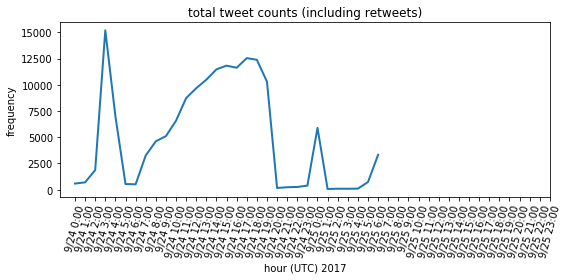

In [3]:
bins_u, bins_c = tw.time_binner(T,by='hour')
time_labels = []
for t in bins_u.keys():
    time_labels.append(str(t[1])+'/'+str(t[2])+' '+str(t[3])+':00')

# figure twitter counts by hour (during streaming)
fig, ax = plt.subplots(1,1,figsize=(8,4))
total_counts = list(bins_c.values())
ax.plot(range(0,len(total_counts)),total_counts,'-',linewidth=2)
ax.set_xticks(range(0,len(time_labels)))
ax.set_xticklabels(time_labels,rotation=75)
ax.set_xlabel('hour (UTC) 2017')
ax.set_ylabel('frequency')
ax.set_title('total tweet counts (including retweets)')
plt.tight_layout()
plt.show()

#### 2.3 Counting the Number of Tweets by Category.

There are four categories of tweets.

1. **Normal.** A set of tweets with no replies and it was never retweeted during streaming. Since these tweets are streamed live, the number of likes, retweeted counts, and reply counts are expected to be zero.
2. **Replied.** A set of tweets that have at least one observed reply. We call the replied tweet as a parent tweet with children as the replies. Only when we stream a reply, we can record a nonzero likes, retweeted counts, and reply counts if any. There some replied tweets with no tweet and user id due to the lack of information from the raw data.
3. **reply.** These are a set of tweets that are replies to tweets. These are the children tweets of the parent tweets. A tweet reply can also be a parent tweet. There some tweet replies with parent tweet with only tweet id information.
4. **Retweets.** These are the tweets that are retweeted/replicated at least once. A retweet can also be a parent tweet.

We can visualize these sets by using the script below.

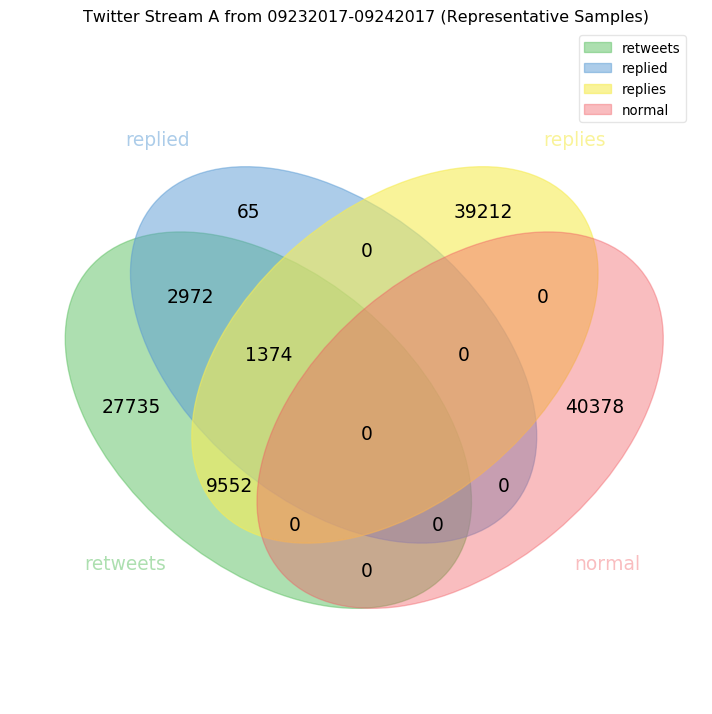

In [4]:
T_categories = tw.tweet_id_categories(T)
info_labels = list(T_categories.keys())
info_sets = [T_categories[i] for i in info_labels]
sets = cp.get_labels(info_sets, fill=['number'])
cp.venn4(sets,names=info_labels,figsize=(9,9))
plt.title('Twitter Stream '+stream+' from '+date_range+' (Representative Samples)')
plt.show()

The above figure shows a venn diagram of the four categories of tweets. We can see that there are zero intersections of the normal tweets (as expected) while the other sets have intersections. We observed that there are 425 replied tweets, 4248 tweet replies, 3612 retweeted tweets. We can also observed that intersection between retweeted set and the replied set; there are 268 retweeted tweet with replies.

#### 2.4 Getting Random tweets from a category.

***Getting random normal tweet information.***

In [5]:
NRT_ids = T.index[T['NRT'] == '1'].tolist()
T.loc[np.random.choice(NRT_ids,size=10,replace=False),['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
912108275239407617,SaintlyMic,Sep 25 2017 00:15:33 +0,0,0,0,I liked a @YouTube video 4 FACTS About HEAVEN ...,*
911914938574233600,oshunblue,Sep 24 2017 11:27:18 +0,0,0,0,Morning thought #always #people #better #doing...,*
911871342688985088,d_svideos,Sep 24 2017 08:34:04 +0,0,0,0,The blue whale Challenge In india/Blue Whale S...,*
911888193045360640,CompassHolidays,Sep 24 2017 09:41:01 +0,0,0,0,The UK is full of #unique and #beautiful spots...,*
911970236756148224,LakshayDhall4,Sep 24 2017 15:07:02 +0,0,0,0,Good Match Pandya good #ViruPanti #INDvAUS,*
912021594524078081,SKAtoons,Sep 24 2017 18:31:07 +0,0,0,0,I finally care about Football. #RESIST,*
911930357079007234,raymondlipford,Sep 24 2017 12:28:34 +0,0,0,0,"Trump targets Paul, Murkowski, McCain on Obama...",*
911884706420895745,YessiBause,Sep 24 2017 09:27:10 +0,0,0,0,Rising with a sweet #CaramelMacchiato @McDonalds,*
911914368509595650,NareshP39630662,Sep 24 2017 11:25:02 +0,0,0,0,ROOPKUND TREK | A Journey To Mysterious Lake |...,*
911999607533654017,eezypeezy,Sep 24 2017 17:03:45 +0,0,0,0,#USA #UK #ZA #NZ - - - Always best to be posit...,*


***Getting random retweeted tweet information.***

In [6]:
RTT_ids = T.index[T['RTT'] == '1'].tolist()
T.loc[np.random.choice(RTT_ids,size=10,replace=False),['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
912012492603314176,i24NEWS_EN,Sep 24 2017 17:54:57 +0,0,2,3,"#BREAKING: One dead, 7 wounded in shooting at ...",Sep 24 2017 17:57:48 +0
911843779728101376,mystique1845,Sep 24 2017 06:44:32 +0,0,1,1,.@raehering on #Periscope: New Single for #Aut...,Sep 24 2017 07:41:42 +0
911987632200146946,ThomasDBradley,Sep 24 2017 16:16:10 +0,43,884,469,Preach Terry Bradshaw! #TakeTheKnee,"Sep 24 2017 16:27:04 +0,Sep 24 2017 16:42:40 +..."
911253158378262528,WFP_Europe,Sep 22 2017 15:37:37 +0,0,2,2,"We know that when we empower #women, we empowe...",Sep 24 2017 09:31:39 +0
911267715754725376,CubaMINREX,Sep 22 2017 16:35:28 +0,2,30,63,Canciller de #Cuba:¿Cuál es la receta milagros...,Sep 24 2017 04:42:54 +0
911803647436234752,iAmLettyB,Sep 24 2017 04:05:04 +0,0,0,1,RT if you’re watching #iHeartFestival.,Sep 24 2017 04:08:27 +0
911942394307923968,ShimanoROAD,Sep 24 2017 13:16:24 +0,4,118,38,Wow! Norwegians know how to make a party 🇳🇴🎉 S...,"Sep 24 2017 13:16:44 +0,Sep 24 2017 14:59:39 +0"
912113967727816704,mara_krmenadla,Sep 25 2017 00:38:10 +0,0,0,1,Lead #Terrorist #Obama has allowed the formati...,Sep 25 2017 00:39:46 +0
910969092680634373,NkirukaNistoran,Sep 21 2017 20:48:51 +0,6,18,313,Why @MBuhari is committing #Genocide on #Biafr...,Sep 24 2017 19:18:44 +0
912027457829658624,E_Williams_1,Sep 24 2017 18:54:25 +0,0,19,8,Hey! If you're protesting the NFL but still wa...,Sep 24 2017 19:40:38 +0


***Getting random replied tweets information.***

In [7]:
RPT_ids = T.index[T['RPT'] == '1'].tolist()
T.loc[np.random.choice(RPT_ids,size=10,replace=False),['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
911988979456716800,HersheSquirt,Sep 24 2017 16:21:31 +0,24,346,333,NFL ARREST DATABASE Instead of taking a knee T...,"Sep 24 2017 16:51:22 +0,Sep 24 2017 17:13:49 +..."
911924365700337669,LeeAmes79,Sep 24 2017 12:04:46 +0,0,0,0,Happy birthday Joseph Ames. 8-years-old and al...,*
911942694863327232,immigrant_legal,Sep 24 2017 13:17:36 +0,44,855,754,Tim Tebow #TakeTheKnee to honor God and the hy...,"Sep 25 2017 06:10:51 +0,Sep 24 2017 13:38:52 +..."
911943684760928257,ThePatriot143,Sep 24 2017 13:21:32 +0,30,248,115,Trump is tip of the spear in a cultural war th...,"Sep 24 2017 13:25:20 +0,Sep 24 2017 13:27:09 +..."
911896280342941696,aj_observations,Sep 24 2017 10:13:10 +0,0,7,2,"Essentially, #ISIS conducted a ceremonial hand...",Sep 24 2017 10:20:39 +0
912062285572710401,dbongino,Sep 24 2017 21:12:48 +0,152,1631,702,The NFL has grossly miscalculated the mood of ...,"Sep 25 2017 06:14:55 +0,Sep 25 2017 00:27:11 +..."
911657716266893313,KamVTV,Sep 23 2017 18:25:11 +0,232,3328,2727,#TakeAKnee but get threatened with a fine for ...,"Sep 24 2017 03:41:17 +0,Sep 24 2017 03:47:32 +..."
911581030418612226,Hoosiers1986,Sep 23 2017 13:20:28 +0,126,2090,1148,#SaturdayMorning I ❤️ @POTUS because he speaks...,"Sep 24 2017 03:02:51 +0,Sep 24 2017 03:02:51 +..."
911940210937794566,Remy_Anne,Sep 24 2017 13:07:43 +0,6,534,26,@realDonaldTrump People turned around and ran ...,"Sep 24 2017 13:57:50 +0,Sep 24 2017 16:53:48 +0"
911676978108993536,seanhannity,Sep 23 2017 19:41:44 +0,640,7448,1747,"To me,one of the best moments on game day is a...","Sep 24 2017 03:09:07 +0,Sep 24 2017 03:16:52 +..."


***Getting random tweet replies information.***

In [8]:
TRP_ids = T.index[T['TRP'] == '1'].tolist()
T.loc[np.random.choice(TRP_ids,size=10,replace=False),['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
911974153942597634,wam3er,Sep 24 2017 15:22:36 +0,*,*,*,@deplorable_www @GoykhmanAlla @mitchellvii Goo...,*
911910530528550913,JimMoor70058163,Sep 24 2017 11:09:47 +0,*,*,*,"@jaketapper Not to change the subject, Mr. Pre...",*
911801713694314497,MarkWatson1967,Sep 24 2017 03:57:23 +0,0,0,0,@guerra_neisy @PalmerReport Good man!,*
912029998147661824,anjeleena_lee,Sep 24 2017 19:04:30 +0,1,11,4,@JackPosobiec Alejandro is the winner no matte...,Sep 24 2017 19:26:42 +0
911939005561937920,EyaTathdias,Sep 24 2017 13:02:56 +0,1,0,1,@Annaliz60166354 @KpefDef @Slim1420 @AllstarSi...,Sep 24 2017 13:14:44 +0
911921138082746368,Southcoastbay7,Sep 24 2017 11:51:56 +0,111,51921,26293,@XLNB @RichStapless Your patriotism is very du...,*
912023619865333761,Lions,Sep 24 2017 18:39:10 +0,3,41,7,First-half #ATLvsDET 📷➡️,"Sep 24 2017 18:42:55 +0,Sep 24 2017 18:50:18 +0"
911931783230435329,Paulinetourlady,Sep 24 2017 12:34:14 +0,918,9892,1285,@chrislhayes She is one crazy bitch! Yet anoth...,*
912035399438024704,ChiGeminorum,Sep 24 2017 19:25:58 +0,199,1381,626,@mitchellvii He doesn't need to try,*
911949273138438144,grsimonoff,Sep 24 2017 13:43:44 +0,100,4160,4220,@tribelaw @dumptrump33 Patriots embrace the EN...,*


#### 2.5 Getting Random User Information.

The user information is a separate dataset from the tweets. You can reference the 'UID' (user id) from the 'tweet' set to get information about the user in the 'user' set and vice versa.

Note that the 'UNFL' (user number of followers) are in a list structure because it corresponds to the user's tweets. This structure let's us track the change of information when a user tweets something.

In [9]:
user_ids = U['USN'].keys().tolist()
U.loc[np.random.choice(user_ids,size=10,replace=False)]

,USN,UT,UNFL
818968955037614080,Tyierra4MVA2017,Jan 10 2017 23:53:09 +0,790
757118699212009472,KassandraSeven,Jul 24 2016 07:42:19 +0,"31686,31606,31606,31609,31609,31612,31617,3161..."
803221140,FalconsFans_CHI,Sep 04 2012 21:14:48 +0,"1453,1452"
14255925,anuradhagoyal,Mar 30 2008 04:23:59 +0,"11467,11468,11475,11479,11479,11480,11480"
3439623525,PhurtFrank,Aug 25 2015 19:37:42 +0,47
3317975402,pcy_gifs,Aug 17 2015 17:35:01 +0,"47580,47580,47580,47581,47580,47580,47580,4758..."
911294251547463681,kriskappy,Sep 22 2017 18:20:55 +0,2
4876036149,classichitradio,Feb 04 2016 11:06:47 +0,"3789,3789,3789,3786,3785,3789,3789,3789,3786,3..."
30870793,deedeedoo23,Apr 13 2009 14:10:09 +0,27
340306612,Voxomize,Jul 22 2011 13:52:08 +0,84


#### 2.6 Getting random tweets of a specific user.

In [12]:
# Alyssa_Milano
tid = np.random.choice(T.index[T['USN']=='Alyssa_Milano'],size=6,replace=False)
T.loc[tid,['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
911742436791275521,Alyssa_Milano,Sep 24 2017 00:01:50 +0,152,8118,2357,Just stopping by to bring the below tweet to y...,"Sep 24 2017 03:04:25 +0,Sep 24 2017 03:14:36 +..."
911983733636521985,Alyssa_Milano,Sep 24 2017 16:00:40 +0,33,637,514,Trump is gutting the #ACA ad budget - help us ...,"Sep 24 2017 16:02:50 +0,Sep 24 2017 16:04:54 +..."
912035983343964160,Alyssa_Milano,Sep 24 2017 19:28:17 +0,2828,11148,2022,"Thank you, @realDonaldTrump for giving me oppo...","Sep 25 2017 06:25:32 +0,Sep 24 2017 19:28:35 +..."
911994304419287040,Alyssa_Milano,Sep 24 2017 16:42:40 +0,138,1896,408,Holy Cow! Did you see this @realDonaldTrump?,"Sep 24 2017 16:44:29 +0,Sep 24 2017 16:44:56 +..."
911035250008055810,Alyssa_Milano,Sep 22 2017 01:11:44 +0,180,5994,3063,"Hey, @realDonaldTrump. This is @lpackard. She ...","Sep 24 2017 03:09:11 +0,Sep 24 2017 03:15:24 +..."
911986882921320448,Alyssa_Milano,Sep 24 2017 16:13:11 +0,35,1564,405,The below may be the tweet of the year. Thank ...,"Sep 24 2017 16:13:27 +0,Sep 24 2017 16:14:58 +..."


In [13]:
# realDonaldTrump
tid = np.random.choice(T.index[T['USN']=='realDonaldTrump'],size=6,replace=False)
T.loc[tid,['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
910219338044657664,realDonaldTrump,Sep 19 2017 19:09:35 +0,10601,67111,17061,"As President of the United States of America, ...","Sep 24 2017 03:50:48 +0,Sep 24 2017 03:50:48 +..."
910898047931912192,realDonaldTrump,Sep 21 2017 16:06:32 +0,4185,43097,8866,It was a great privilege to meet with Presiden...,"Sep 25 2017 06:20:39 +0,Sep 24 2017 11:28:24 +..."
909922763774861314,realDonaldTrump,Sep 18 2017 23:31:07 +0,5491,51112,11873,"Such an honor to have my good friend, Israel P...",Sep 24 2017 11:22:52 +0
597831508557180932,realDonaldTrump,May 11 2015 18:31:53 +0,97,1438,1634,Great shot by @KingJames yesterday. Lebron is ...,Sep 24 2017 04:05:06 +0
910885755320459264,realDonaldTrump,Sep 21 2017 15:17:42 +0,2702,29741,6212,It was wonderful to have President Petro Poros...,"Sep 24 2017 03:15:57 +0,Sep 24 2017 03:15:57 +..."
911700914997792769,realDonaldTrump,Sep 23 2017 21:16:51 +0,19128,89960,16381,Very proud of our incredible First Lady (@FLOT...,"Sep 24 2017 03:00:33 +0,Sep 24 2017 03:04:26 +..."


### 3. Stream, FIlter and Process Live Tweets.

Using the streamer scripts **streamTwitter.py**, **loop.streamTweets.sh**, and **run.loop.streamTweets.sh** requires two things.

1. The NLTK python modules which is available in this website ( https://www.nltk.org/ ). You can read about it in detail in this book by Bird et. al. [1].

2. Twitter Application Progamming Interface (API) keys.

#### 3.1 Installing the Natural Language Tool Kit (NLTK) and NLTK Corpora.

***Install NLTK using Linux terminal.***

```bash
sudo pip install -U nltk
```

***Install NLTK Corpora using Python.***

```python
import nltk
nltk.download()
```

#### 3.2 Setting Up the Twitter Application Programming Interface (API).

You can follow the NLTK instructions for setting up the API here ( <a href="http://www.nltk.org/howto/twitter.html">NLTK</a> ) but essentially it comes down into three steps.

* **Step 1.** Create a Twitter account ( <a href="https://twitter.com/?lang=en">twitter.com</a> )
* **Step 2.** Apply for a developer account - standard API ( <a href="https://developer.twitter.com/en/apply-for-access">developer.twitter.com</a> )
* **Step 3.** Copy your keys in the format - shown below - while saving it into a text file named ***credentials.txt***. Create a folder/directory ***twitter-files*** in your home directory and place the text file into that new folder.

```bash
app_key=[key]
app_secret=[secret]
oauth_token=[token]
oauth_token_secret=[secret token]
```

#### 3.3 Streaming and Filtering Live Tweets.

Before you can stream, you need to provide a list of keywords. The NLTK streamer requires a list of keywords to capture live tweets with those keywords.

For example you need to create a text file named ***keywords-stream[X].txt*** in the ***keywords-stream*** folder where **[X]** is the whatever you want to name your list. Then, list all the keywords inside the text file like shown below.

```bash
normal
abnormal
supernormal
unnormal
binormal
mononormal
uninormal
homonormal
heteronormal
```

Next, edit the lines shown below of the bash script **run.loop.streamTweets.sh**. The ***path_twitterFiles*** variable is the absolute path to the **credentials.txt** file. The ***STDVID*** is the name of your list **[X]**. Below is an example where we tell the streamer to take 4000 tweets for every loop until August 14, 2018 at 6:14 pm (the time is in 24-hour format). If the entered time is in the past, then the loop will just immediately stop upon execution.

```bash
path_twitterFiles="/home/[username]/twitter-files"

STDVID=[X]
stopDay=14
stopMonth=08
stopYear=2018
stopHour=18
stopMinute=14
tweetsPerLoop=4000
```

Save the updated **run.loop.streamTweets.sh** and run it using the command below on linux terminal. The streamer saves the tweets every loop and filters and compresses the tweets every day and for every month.

```bash
./run.loop.streamTweets.sh
```

#### 3.4 Processing Live Tweets.

Make sure you have the compressed filtered data in the **[X]-filtered** folder where **[X]** is the name of the keywords list. The streamer saves the tweets in JSON format ( you can see an overview of the JSON data structure here ( <a href="https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object"> tweet-object </a>).

The processor will process the JSON file such that it takes in information and converts it into a python dictionary data structure for easy access. The advantage of this data structure is that we can track connected tweets (i.e. replies and retweets to the a parent tweet) more easily than dealing with the JSON files directly.

To process the streamed tweets, use the **processTweets.sh** bash file. This file takes in three arguments.

1. **[X]** $\rightarrow$ The name of the keyword list.
2. An array of specified dates you want to process.
3. The number of cores you want use (the code is paralellized in a multi-threading fasion where it can process $n$ tweets at a time).

Use the example bash script below where it will process the data set using the A keyword list from September 23, 2017 to September 24, 2017 and using 3 cores. The processed tweets is saved into **[X]-processed** folder.

*Download Filtered Data First (see Section 2).*

```bash
STDVID=A
dates=("09232017" "09232017")
./processTweets.py ${STDVID} "${dates[*]}" 3
```
```bash
STDVID=A
dates=("09232017" "09242017")
./processTweets.py ${STDVID} "${dates[*]}" 3
```

### 4. Tabulate and Subset Tweets.

#### 4.1. Tabulating Tweets.

Make sure you have the processed data in the **[X]-processed** where **[X]** is the name of the keywords list.

Use the example bash script below where it will tabulate the processed data using A keyword list from September 23, 2017 to September 24, 2017. The tabulated tweets is saved into **[X]-tabulated** folder.

*Download Processed Data First (see Section 2).*

```bash
./tabulateTweets.py 'A' '09232017-09232017'
./tabulateTweets.py 'A' '09232017-09242017'
```

#### 4.2. Subsetting Tabulated Tweets.

Create a folder named **keywords-subset** and make a text file named **keywords-[F]-[Y].txt** where **[F]** is the column to filter and **[Y]** is for whatever you want to name your keyword subset list. Then, list all the keywords like shown below or the hashtag list in Section 2.

```
hashtag
love
hate
```

Use the example bash script below where it will subset the tabulated data set using the hashtag keyword list named **a** from September 23, 2017 to September 24, 2017. The tabulated tweets is saved into **[X]-subset** folder. The third line of the below script is where you can merge two tabulated tweets. The merged tweet is saved into **[X]-merged** folder.

*Download Tabulated Data First (see Section 2).*

```bash
./subsetTweets.py 'A' 'hashtag' 'a' '09232017-09232017' 100000 % print status every 100000th tweet
./subsetTweets.py 'A' 'hashtag' 'a' '09232017-09242017' 100000 % print status every 100000th tweet
./mergeTweets.py 'A' 'subset' '09232017-09242017' 'hashtag' 'a'
```

### References

1. Bird, Steven, Ewan Klein, and Edward Loper. Natural language processing with Python: analyzing text with the natural language toolkit. " O'Reilly Media, Inc.", 2009.